# Prueba técnica

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. LECTURA Y GUARDADO DE BASES

In [12]:
clientes_01 = pd.read_csv('CLIENTES_01.csv', sep=';', header=0)
clientes_02 = pd.read_csv('CLIENTES_02.csv', sep=';', header=0)

In [13]:
clientes_01 = clientes_01.set_index('ID_PERSONA')
clientes_02 = clientes_02.set_index('ID_PERSONA')

In [14]:
clientes_03 = clientes_01.join(clientes_02, on='ID_PERSONA')
clientes_03.to_csv("CLIENTES03.csv", sep=';')

## 2. CONSTRUCCIÓN Y ANÁLISIS DE VARIABLES

In [15]:
clientes_03['RAT_AP'] = (clientes_03['PAS_CIRCULANTE'] + clientes_03['PAS_LARGO_PLAZO'])/clientes_03['CAPITAL']

In [16]:
clientes_03.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, CLPR001 to CLPR999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACTIVO_TOTAL        999 non-null    int64  
 1   CAJA_BANCOS         999 non-null    float64
 2   CAPITAL             998 non-null    float64
 3   DOCS_X_COBRAR       871 non-null    float64
 4   COSTO_VTAS          999 non-null    int64  
 5   DEUDORES_DIV        999 non-null    int64  
 6   PAS_CIRCULANTE      999 non-null    int64  
 7   PAS_LARGO_PLAZO     998 non-null    float64
 8   VTAS_NETAS_TOTALES  998 non-null    float64
 9   ANIOS_FUNCIONA      998 non-null    float64
 10  SECTOR_AIS          998 non-null    float64
 11  MORA                998 non-null    float64
 12  RAT_AP              997 non-null    float64
dtypes: float64(9), int64(4)
memory usage: 109.3+ KB


In [17]:
clientes_03.describe()

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
count,9.990000e+02,9.990000e+02,9.980000e+02,8.710000e+02,9.990000e+02,9.990000e+02,9.990000e+02,9.980000e+02,9.980000e+02,998.000000,998.000000,998.000000,997.000000
mean,6.623168e+07,1.301301e+14,4.094475e+07,9.635767e+06,2.424564e+07,1.403152e+06,1.731571e+07,7.999902e+06,3.850747e+07,5.743487,3.570140,0.183367,0.847371
std,2.535585e+08,4.113018e+15,2.048577e+08,3.281933e+07,2.150295e+07,4.343665e+06,4.555921e+07,4.701118e+07,2.466604e+07,4.577685,1.747499,0.387161,7.887060
min,9.030000e+03,-6.593000e+06,-1.435300e+07,-1.600000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-1.693000e+06,1.000000e+03,-80.000000,1.000000,0.000000,-190.230519
25%,1.559300e+07,1.760000e+05,6.864750e+06,1.065500e+06,3.539000e+06,0.000000e+00,3.434500e+06,0.000000e+00,1.769275e+07,3.000000,2.000000,0.000000,0.254700
50%,2.955700e+07,5.080000e+05,1.599350e+07,3.985000e+06,2.066800e+07,1.340000e+05,7.891000e+06,2.805000e+05,3.639300e+07,6.000000,4.000000,0.000000,0.649259
75%,5.645150e+07,1.489500e+06,3.238475e+07,1.080250e+07,3.939700e+07,1.017000e+06,1.713000e+07,4.027500e+06,5.771575e+07,9.000000,5.000000,0.000000,1.397363
max,6.521729e+09,1.300000e+17,5.106718e+09,7.032370e+08,9.093000e+07,5.241000e+07,8.201800e+08,1.193737e+09,8.965000e+07,12.000000,6.000000,1.000000,99.837209


In [18]:
categoricas = ['SECTOR_AIS', 'MORA']
clientes_03_cat = clientes_03.copy()
clientes_03_cat[categoricas] = clientes_03[categoricas].astype('category')

In [19]:
clientes_03['DOCS_X_COBRAR'][clientes_03['DOCS_X_COBRAR'].notnull()].describe()

count    8.710000e+02
mean     9.635767e+06
std      3.281933e+07
min     -1.600000e+04
25%      1.065500e+06
50%      3.985000e+06
75%      1.080250e+07
max      7.032370e+08
Name: DOCS_X_COBRAR, dtype: float64

In [20]:
clientes_03[clientes_03['MORA'].isnull()]

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
ID_PERSONA,,,,,,,,,,,,,
CLPR013,22121000,494000.0,18993000.0,3985000.0,20928000,3242000,3128000,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
clientes_03[clientes_03['DOCS_X_COBRAR'].isnull()]

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
ID_PERSONA,,,,,,,,,,,,,
CLPR009,4384000,32000.0,1029000.0,NaN,35306000,214000,3355000,0.0,35691000.0,12.0,6.0,0.0,3.260447
CLPR010,23502000,747000.0,4476000.0,NaN,10543000,11000,14978000,4048000.0,16081000.0,0.0,4.0,0.0,4.250670
CLPR014,755414000,36000.0,631286000.0,NaN,37801000,0,98605000,25523000.0,66055000.0,5.0,1.0,1.0,0.196627
CLPR024,19961000,0.0,1435000.0,NaN,4525000,0,5330000,13196000.0,8819000.0,6.0,5.0,0.0,12.910105
CLPR028,14863000,221000.0,11847000.0,NaN,14017000,1173000,3016000,0.0,18720000.0,10.0,1.0,0.0,0.254579
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLPR919,198520000,3476000.0,120920000.0,NaN,0,663000,67878000,9722000.0,40531000.0,8.0,3.0,1.0,0.641747
CLPR956,55847000,910000.0,37676000.0,NaN,0,0,3379000,14792000.0,4976000.0,5.0,4.0,0.0,0.482296
CLPR962,39452000,66000.0,38028000.0,NaN,1653000,105000,579000,845000.0,4804000.0,4.0,4.0,0.0,0.037446


In [22]:
correlaciones = clientes_03.corr()['MORA'].abs().sort_values(ascending=False)
correlaciones

MORA                  1.000000
COSTO_VTAS            0.244378
VTAS_NETAS_TOTALES    0.204734
DOCS_X_COBRAR         0.177443
PAS_CIRCULANTE        0.160808
DEUDORES_DIV          0.146775
ACTIVO_TOTAL          0.140788
CAPITAL               0.114079
PAS_LARGO_PLAZO       0.106543
SECTOR_AIS            0.087965
CAJA_BANCOS           0.015007
ANIOS_FUNCIONA        0.008522
RAT_AP                0.005303
Name: MORA, dtype: float64

In [23]:
variables_interes = [x for x in correlaciones.drop('MORA').index if correlaciones[x] > 0.10]

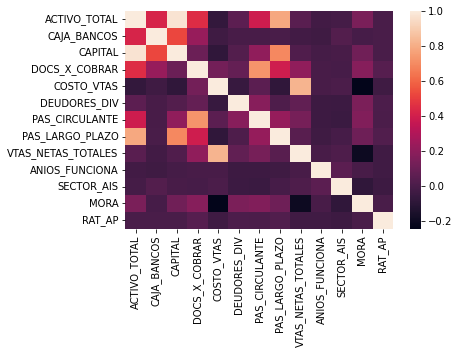

In [24]:
sns.heatmap(clientes_03.corr())
plt.savefig('Correlaciones.png')

In [25]:
clientes_03[clientes_03['ACTIVO_TOTAL']>0]

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
ID_PERSONA,,,,,,,,,,,,,
CLPR001,24358000,450000.0,11999000.0,944000.0,30884000,450000,12294000,65000.0,40246000.0,0.0,3.0,0.0,1.030003
CLPR002,46230000,178000.0,4432000.0,3394000.0,22365000,1353000,27025000,14773000.0,23287000.0,11.0,6.0,0.0,9.430957
CLPR003,20141000,201000.0,15174000.0,5223000.0,66000,2000,760000,4207000.0,24128000.0,12.0,4.0,0.0,0.327336
CLPR004,27986000,1012000.0,15940000.0,11021000.0,58401000,49000,11825000,221000.0,65948000.0,8.0,4.0,0.0,0.755709
CLPR005,14714000,830000.0,7773000.0,6026000.0,63847000,48000,4983000,1958000.0,67094000.0,1.0,5.0,0.0,0.892963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLPR995,30810000,658000.0,25709000.0,3829000.0,17572000,103000,4115000,986000.0,48360000.0,8.0,6.0,0.0,0.198413
CLPR996,27001000,13000.0,12248000.0,296000.0,25865000,0,14753000,0.0,35924000.0,1.0,4.0,0.0,1.204523
CLPR997,11986000,144000.0,6093000.0,2392000.0,15139000,2705000,5893000,0.0,20115000.0,11.0,6.0,0.0,0.967175


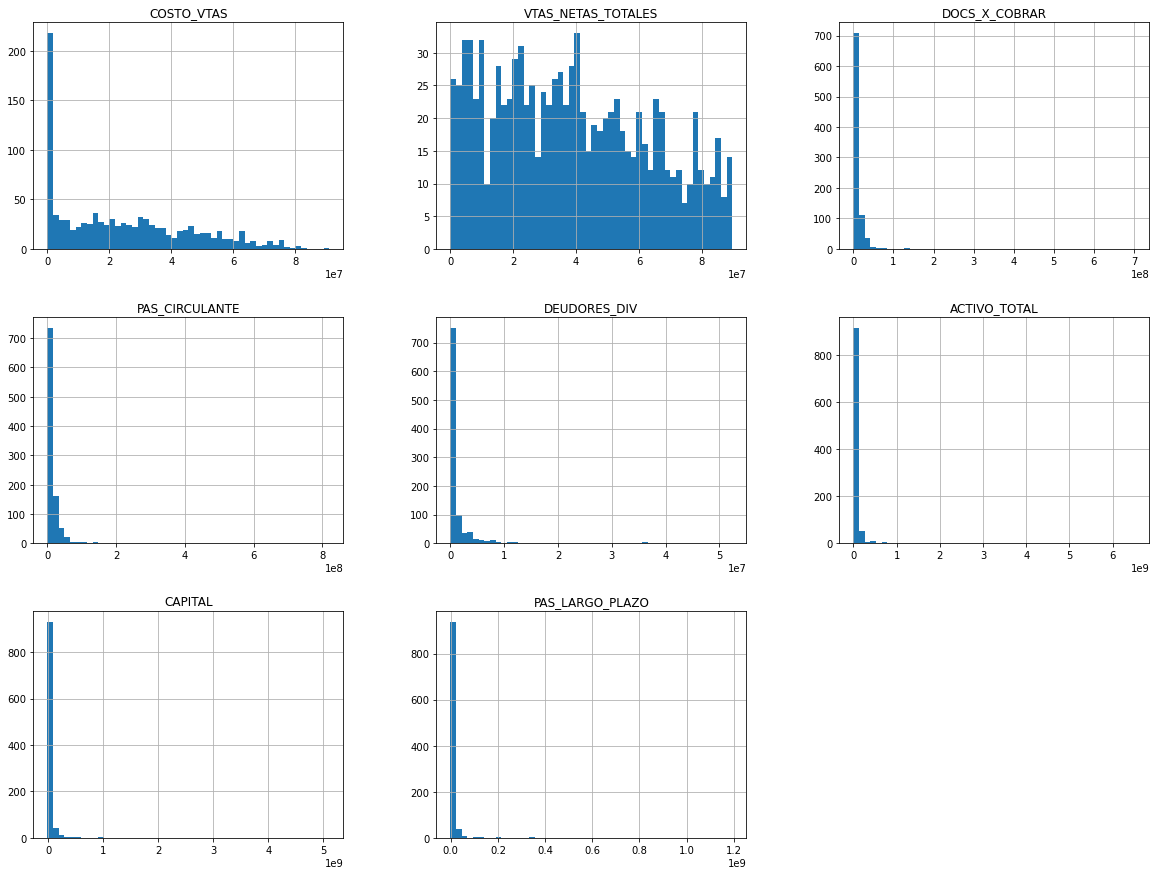

In [26]:
clientes_03[variables_interes].hist(bins=50, figsize=(20,15))
plt.savefig('Histogramas.png')

In [27]:
correlaciones

MORA                  1.000000
COSTO_VTAS            0.244378
VTAS_NETAS_TOTALES    0.204734
DOCS_X_COBRAR         0.177443
PAS_CIRCULANTE        0.160808
DEUDORES_DIV          0.146775
ACTIVO_TOTAL          0.140788
CAPITAL               0.114079
PAS_LARGO_PLAZO       0.106543
SECTOR_AIS            0.087965
CAJA_BANCOS           0.015007
ANIOS_FUNCIONA        0.008522
RAT_AP                0.005303
Name: MORA, dtype: float64

<AxesSubplot:xlabel='COSTO_VTAS', ylabel='Count'>

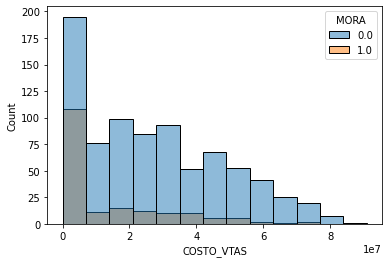

In [28]:
sns.histplot(data=clientes_03_cat, x='COSTO_VTAS', hue='MORA')

<AxesSubplot:xlabel='VTAS_NETAS_TOTALES', ylabel='Count'>

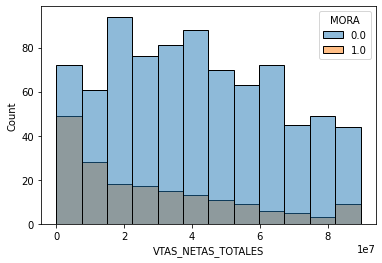

In [29]:
sns.histplot(data=clientes_03_cat, x='VTAS_NETAS_TOTALES', hue='MORA')

## MODELIZACIÓN

### Limpeza

In [30]:
clientes_03[clientes_03['MORA'].isnull()]

,ACTIVO_TOTAL,CAJA_BANCOS,CAPITAL,DOCS_X_COBRAR,COSTO_VTAS,DEUDORES_DIV,PAS_CIRCULANTE,PAS_LARGO_PLAZO,VTAS_NETAS_TOTALES,ANIOS_FUNCIONA,SECTOR_AIS,MORA,RAT_AP
ID_PERSONA,,,,,,,,,,,,,
CLPR013,22121000,494000.0,18993000.0,3985000.0,20928000,3242000,3128000,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
clientes_03_modelo = clientes_03_cat.copy()
clientes_03_modelo = clientes_03_modelo[clientes_03_modelo['MORA'].notnull()]
clientes_03_modelo = clientes_03_modelo[clientes_03_modelo['CAPITAL'].notnull()]

In [61]:
mediana_doc_x_cobrar = clientes_03_modelo['DOCS_X_COBRAR'].median()

In [62]:
clientes_03_modelo['DOCS_X_COBRAR'] = clientes_03_modelo['DOCS_X_COBRAR'].fillna(mediana_doc_x_cobrar)

In [63]:
X = clientes_03_modelo.drop(columns='MORA')
y = clientes_03_modelo['MORA']

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [73]:
from sklearn.metrics import confusion_matrix
predicciones = logit_reg.predict(X_test)
conf_mat = confusion_matrix(y_test, predicciones)
print('Precision: ', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall: ', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision:  0.7972972972972973
Recall:  0.9874476987447699
Specificity 0.01639344262295082


In [ ]:
import xgb
xgb.